Import necessary libraries

In [380]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


Read CSV to dataframe

In [381]:
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

Check if there's Null in dataframe

In [382]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Analyze the dataframe

In [383]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Split features and label

In [384]:
X = df.iloc[:, 0:11]
y = df.iloc[:, 11:]

Split data to train and test (automatized by skilearn!!)

In [385]:
# X_train = X[0:1000]
# X_val = X[1000:1300]
# X_test = X[1300:]

# Y_train = Y[0:1000]
# Y_val = Y[1000:1300]
# Y_test = Y[1300:]

# train_dataset = df.sample(frac=0.8, random_state=0)
# test_dataset = df.drop(train_dataset.index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

**LINEAR REGRESSION**

In [386]:
model = linear_model.LinearRegression()

In [387]:
model.fit(X_train, y_train)

LinearRegression()

In [388]:
predicted = model.predict(X_test)

In [389]:
print(mean_squared_error(y_test, predicted))

0.469082536345541


***Neural Network***

Create Model

In [405]:
from keras.models import *
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam
nn_model = tf.keras.Sequential()
nn_model.add(Dense(10))
nn_model.add(Activation('relu'))
nn_model.add(Dense(64))
nn_model.add(Activation('relu'))
nn_model.add(Dense(128))
nn_model.add(Activation('relu'))
nn_model.add(Dense(1))
nn_model.add(Activation('relu'))

Compile model, set the optimizer, loss function, matrics, etc

In [406]:
nn_model.compile(optimizer=Adam(1e-4),
              loss="mae",   
              metrics=["accuracy"]
             )
# nn_model.build()

Train the model

In [410]:
history = nn_model.fit(
            X_train,
            y_train,
            epochs = 1000,
            validation_split=0.2,
            verbose = 1
)

Epoch 1/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.0000e+00 - val_loss: 0.5145 - val_accuracy: 0.0000e+00
Epoch 2/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5403 - accuracy: 0.0000e+00 - val_loss: 0.5149 - val_accuracy: 0.0000e+00
Epoch 3/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.0000e+00 - val_loss: 0.5133 - val_accuracy: 0.0000e+00
Epoch 4/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.0000e+00 - val_loss: 0.5463 - val_accuracy: 0.0000e+00
Epoch 5/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5453 - accuracy: 0.0000e+00 - val_loss: 0.5218 - val_accuracy: 0.0000e+00
Epoch 6/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.0000e+00 - val_loss: 0.5048 - val_accuracy: 0.0000e+00
Epoch 7/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.0000e

36/36 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.0000e+00 - val_loss: 0.5059 - val_accuracy: 0.0000e+00
Epoch 56/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.5121 - accuracy: 0.0000e+00 - val_loss: 0.5016 - val_accuracy: 0.0000e+00
Epoch 57/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.0000e+00 - val_loss: 0.5022 - val_accuracy: 0.0000e+00
Epoch 58/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.0000e+00 - val_loss: 0.5004 - val_accuracy: 0.0000e+00
Epoch 59/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.0000e+00 - val_loss: 0.4996 - val_accuracy: 0.0000e+00
Epoch 60/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.0000e+00 - val_loss: 0.4989 - val_accuracy: 0.0000e+00
Epoch 61/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.0000e+00 - v

36/36 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.0000e+00 - val_loss: 0.5003 - val_accuracy: 0.0000e+00
Epoch 110/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.0000e+00 - val_loss: 0.5051 - val_accuracy: 0.0000e+00
Epoch 111/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.0000e+00 - val_loss: 0.4931 - val_accuracy: 0.0000e+00
Epoch 112/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.0000e+00 - val_loss: 0.5071 - val_accuracy: 0.0000e+00
Epoch 113/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.0000e+00 - val_loss: 0.4979 - val_accuracy: 0.0000e+00
Epoch 114/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.0000e+00 - val_loss: 0.4993 - val_accuracy: 0.0000e+00
Epoch 115/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.0000e+

Epoch 163/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.0000e+00 - val_loss: 0.4878 - val_accuracy: 0.0000e+00
Epoch 164/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.0000e+00 - val_loss: 0.5007 - val_accuracy: 0.0000e+00
Epoch 165/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.0000e+00 - val_loss: 0.4891 - val_accuracy: 0.0000e+00
Epoch 166/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.0000e+00 - val_loss: 0.4861 - val_accuracy: 0.0000e+00
Epoch 167/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.0000e+00 - val_loss: 0.4875 - val_accuracy: 0.0000e+00
Epoch 168/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.0000e+00 - val_loss: 0.4875 - val_accuracy: 0.0000e+00
Epoch 169/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4999 - acc

Epoch 217/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.0000e+00 - val_loss: 0.4956 - val_accuracy: 0.0000e+00
Epoch 218/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.0000e+00 - val_loss: 0.5163 - val_accuracy: 0.0000e+00
Epoch 219/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.0000e+00 - val_loss: 0.4880 - val_accuracy: 0.0000e+00
Epoch 220/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.0000e+00 - val_loss: 0.5672 - val_accuracy: 0.0000e+00
Epoch 221/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.0000e+00 - val_loss: 0.5007 - val_accuracy: 0.0000e+00
Epoch 222/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5094 - accuracy: 0.0000e+00 - val_loss: 0.4949 - val_accuracy: 0.0000e+00
Epoch 223/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4911 - acc

Epoch 271/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.0000e+00 - val_loss: 0.4817 - val_accuracy: 0.0000e+00
Epoch 272/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.0000e+00 - val_loss: 0.4890 - val_accuracy: 0.0000e+00
Epoch 273/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.0000e+00 - val_loss: 0.5114 - val_accuracy: 0.0000e+00
Epoch 274/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.0000e+00 - val_loss: 0.4881 - val_accuracy: 0.0000e+00
Epoch 275/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.0000e+00 - val_loss: 0.4828 - val_accuracy: 0.0000e+00
Epoch 276/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.0000e+00 - val_loss: 0.4922 - val_accuracy: 0.0000e+00
Epoch 277/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4910 - acc

Epoch 325/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.0000e+00 - val_loss: 0.5026 - val_accuracy: 0.0000e+00
Epoch 326/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.0000e+00 - val_loss: 0.5058 - val_accuracy: 0.0000e+00
Epoch 327/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.0000e+00 - val_loss: 0.4877 - val_accuracy: 0.0000e+00
Epoch 328/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.0000e+00 - val_loss: 0.4975 - val_accuracy: 0.0000e+00
Epoch 329/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.0000e+00 - val_loss: 0.4797 - val_accuracy: 0.0000e+00
Epoch 330/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.0000e+00 - val_loss: 0.4869 - val_accuracy: 0.0000e+00
Epoch 331/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4818 - acc

Epoch 379/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.0000e+00 - val_loss: 0.4844 - val_accuracy: 0.0000e+00
Epoch 380/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.0000e+00 - val_loss: 0.4893 - val_accuracy: 0.0000e+00
Epoch 381/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.0000e+00 - val_loss: 0.4959 - val_accuracy: 0.0000e+00
Epoch 382/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.0000e+00 - val_loss: 0.4836 - val_accuracy: 0.0000e+00
Epoch 383/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.0000e+00 - val_loss: 0.4818 - val_accuracy: 0.0000e+00
Epoch 384/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.0000e+00 - val_loss: 0.4805 - val_accuracy: 0.0000e+00
Epoch 385/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4754 - acc

Epoch 433/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.0000e+00 - val_loss: 0.4992 - val_accuracy: 0.0000e+00
Epoch 434/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.0000e+00 - val_loss: 0.4840 - val_accuracy: 0.0000e+00
Epoch 435/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.0000e+00 - val_loss: 0.4815 - val_accuracy: 0.0000e+00
Epoch 436/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.0000e+00 - val_loss: 0.4821 - val_accuracy: 0.0000e+00
Epoch 437/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4766 - accuracy: 0.0000e+00 - val_loss: 0.4883 - val_accuracy: 0.0000e+00
Epoch 438/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.0000e+00 - val_loss: 0.4878 - val_accuracy: 0.0000e+00
Epoch 439/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4859 - acc

Epoch 487/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.0000e+00 - val_loss: 0.4886 - val_accuracy: 0.0000e+00
Epoch 488/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.0000e+00 - val_loss: 0.4843 - val_accuracy: 0.0000e+00
Epoch 489/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.0000e+00 - val_loss: 0.4873 - val_accuracy: 0.0000e+00
Epoch 490/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.0000e+00 - val_loss: 0.4809 - val_accuracy: 0.0000e+00
Epoch 491/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.0000e+00 - val_loss: 0.4869 - val_accuracy: 0.0000e+00
Epoch 492/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.0000e+00 - val_loss: 0.4811 - val_accuracy: 0.0000e+00
Epoch 493/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4720 - acc

Epoch 541/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.0000e+00 - val_loss: 0.4768 - val_accuracy: 0.0000e+00
Epoch 542/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.0000e+00 - val_loss: 0.4883 - val_accuracy: 0.0000e+00
Epoch 543/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.0000e+00 - val_loss: 0.5015 - val_accuracy: 0.0000e+00
Epoch 544/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.0000e+00 - val_loss: 0.5037 - val_accuracy: 0.0000e+00
Epoch 545/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.0000e+00 - val_loss: 0.4816 - val_accuracy: 0.0000e+00
Epoch 546/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.0000e+00 - val_loss: 0.4831 - val_accuracy: 0.0000e+00
Epoch 547/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4688 - acc

Epoch 595/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.0000e+00 - val_loss: 0.4816 - val_accuracy: 0.0000e+00
Epoch 596/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.0000e+00 - val_loss: 0.4800 - val_accuracy: 0.0000e+00
Epoch 597/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.0000e+00 - val_loss: 0.4842 - val_accuracy: 0.0000e+00
Epoch 598/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.0000e+00 - val_loss: 0.4826 - val_accuracy: 0.0000e+00
Epoch 599/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.0000e+00 - val_loss: 0.4984 - val_accuracy: 0.0000e+00
Epoch 600/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.0000e+00 - val_loss: 0.4883 - val_accuracy: 0.0000e+00
Epoch 601/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4692 - acc

Epoch 649/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.0000e+00 - val_loss: 0.4808 - val_accuracy: 0.0000e+00
Epoch 650/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.0000e+00 - val_loss: 0.4942 - val_accuracy: 0.0000e+00
Epoch 651/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.0000e+00 - val_loss: 0.4934 - val_accuracy: 0.0000e+00
Epoch 652/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.0000e+00 - val_loss: 0.4936 - val_accuracy: 0.0000e+00
Epoch 653/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.0000e+00 - val_loss: 0.5147 - val_accuracy: 0.0000e+00
Epoch 654/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.0000e+00 - val_loss: 0.4804 - val_accuracy: 0.0000e+00
Epoch 655/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4577 - acc

Epoch 703/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4638 - accuracy: 0.0000e+00 - val_loss: 0.4913 - val_accuracy: 0.0000e+00
Epoch 704/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.0000e+00 - val_loss: 0.4818 - val_accuracy: 0.0000e+00
Epoch 705/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.0000e+00 - val_loss: 0.4861 - val_accuracy: 0.0000e+00
Epoch 706/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.0000e+00 - val_loss: 0.4858 - val_accuracy: 0.0000e+00
Epoch 707/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.0000e+00 - val_loss: 0.4842 - val_accuracy: 0.0000e+00
Epoch 708/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.0000e+00 - val_loss: 0.4872 - val_accuracy: 0.0000e+00
Epoch 709/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4693 - acc

Epoch 757/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.0000e+00 - val_loss: 0.4845 - val_accuracy: 0.0000e+00
Epoch 758/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.0000e+00 - val_loss: 0.4825 - val_accuracy: 0.0000e+00
Epoch 759/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.0000e+00 - val_loss: 0.4863 - val_accuracy: 0.0000e+00
Epoch 760/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.0000e+00 - val_loss: 0.4918 - val_accuracy: 0.0000e+00
Epoch 761/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.0000e+00 - val_loss: 0.4793 - val_accuracy: 0.0000e+00
Epoch 762/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.0000e+00 - val_loss: 0.5053 - val_accuracy: 0.0000e+00
Epoch 763/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4574 - acc

Epoch 811/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.0000e+00 - val_loss: 0.4897 - val_accuracy: 0.0000e+00
Epoch 812/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.0000e+00 - val_loss: 0.5053 - val_accuracy: 0.0000e+00
Epoch 813/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.0000e+00 - val_loss: 0.4909 - val_accuracy: 0.0000e+00
Epoch 814/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.0000e+00 - val_loss: 0.4855 - val_accuracy: 0.0000e+00
Epoch 815/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.0000e+00 - val_loss: 0.4826 - val_accuracy: 0.0000e+00
Epoch 816/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.0000e+00 - val_loss: 0.4874 - val_accuracy: 0.0000e+00
Epoch 817/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4512 - acc

Epoch 865/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.0000e+00 - val_loss: 0.4870 - val_accuracy: 0.0000e+00
Epoch 866/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.0000e+00 - val_loss: 0.4988 - val_accuracy: 0.0000e+00
Epoch 867/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.0000e+00 - val_loss: 0.4975 - val_accuracy: 0.0000e+00
Epoch 868/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.0000e+00 - val_loss: 0.5033 - val_accuracy: 0.0000e+00
Epoch 869/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.0000e+00 - val_loss: 0.4912 - val_accuracy: 0.0000e+00
Epoch 870/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.0000e+00 - val_loss: 0.4825 - val_accuracy: 0.0000e+00
Epoch 871/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4563 - acc

Epoch 919/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.0000e+00 - val_loss: 0.4872 - val_accuracy: 0.0000e+00
Epoch 920/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.0000e+00 - val_loss: 0.4958 - val_accuracy: 0.0000e+00
Epoch 921/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.0000e+00 - val_loss: 0.4888 - val_accuracy: 0.0000e+00
Epoch 922/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.0000e+00 - val_loss: 0.4873 - val_accuracy: 0.0000e+00
Epoch 923/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.0000e+00 - val_loss: 0.4914 - val_accuracy: 0.0000e+00
Epoch 924/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.0000e+00 - val_loss: 0.4857 - val_accuracy: 0.0000e+00
Epoch 925/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4466 - acc

Epoch 973/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.0000e+00 - val_loss: 0.4855 - val_accuracy: 0.0000e+00
Epoch 974/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.0000e+00 - val_loss: 0.4870 - val_accuracy: 0.0000e+00
Epoch 975/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.0000e+00 - val_loss: 0.4859 - val_accuracy: 0.0000e+00
Epoch 976/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.0000e+00 - val_loss: 0.4886 - val_accuracy: 0.0000e+00
Epoch 977/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.0000e+00 - val_loss: 0.4867 - val_accuracy: 0.0000e+00
Epoch 978/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.0000e+00 - val_loss: 0.4919 - val_accuracy: 0.0000e+00
Epoch 979/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4441 - acc

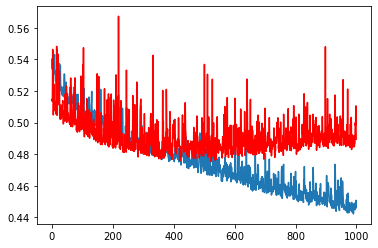

In [411]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"], color="red")

In [412]:
nn_pred = nn_model.predict(X_test)
mean_squared_error(y_test, nn_pred)

0.5068189473049287

Conclusion: Neural Networks performs as well as Linear Regression. It depends on the weights initialization.
Sometimes the NN doesn't work at all, and I have no idea about it. But it can be fixed by rerun the model.

That's enough for today, not bad for the first day.
I guess I should try to cluster this data tomorrow. or.. visualize it?


